In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
def latlon(hid,vid,x=0,y=0):
    lat_0 = 60
    lon_0 = -180
    res_x = 0.01                # 0.02 for the 2km grid
    res_y = 0.01                # 0.02 for the 2km grid
    tile_xdim = 600            # 300 for the 2km grid
    tile_ydim = 600            # 300 for the 2km grid

    # Output formula 
    lat_ulcnr = lat_0 - (vid*tile_ydim + y)*res_y        # upper-left corner latitude
    lon_ulcnr = lon_0 + (hid*tile_xdim + x)*res_y     # upper-left corner longitude
    
    return lat_ulcnr, lon_ulcnr

def proj_geonex(lon,lat,size,res):
    vid=int((60-lat)/(size*res))
    hid=int((180+lon)/(size*res))
    y=(60-lat)/res-vid*size
    x=(lon+180)/res-hid*size
    return hid,vid,x,y

In [3]:
sitelist = pd.read_csv('/gpfs/data1/lianggp/lir/solar_data/code/15min_station.csv',low_memory=False)

In [5]:
cases = sitelist.groupby('tile_id').get_group('h17v03')
meta = cases[:1].squeeze()
meta

id                            5
name                        psu
lats                      40.72
lons                     -77.93
network                 SURFRAD
iH                           17
iV                            3
fLine                         7
fCol                        128
elev                   375.5625
timezone       America/New_York
tile_id                  h17v03
lat_ulcnr                  42.0
lon_ulcnr                 -78.0
lat_lrcnr                  36.0
lon_lrcnr                 -72.0
time_offset                -5.0
Name: 4, dtype: object

In [23]:
# testlist = [6,7,14,31,37]
# sitelist['test'] = 0  # Initialize the column with 0s
# sitelist.loc[sitelist['id'].isin(testlist), 'test'] = 1 
# sitelist

,id,name,lats,lons,network,iH,iV,fLine,fCol,elev,timezone,tile_id,lat_ulcnr,lon_ulcnr,lat_lrcnr,lon_lrcnr,time_offset,test
0,1,bon,40.050,-88.370,SURFRAD,15,3,163,195,213.0000,America/Chicago,h15v03,42.0,-90.0,36.0,-84.0,-6.0,0
1,2,fpk,48.310,-105.100,SURFRAD,12,1,290,568,623.3125,America/Denver,h12v01,54.0,-108.0,48.0,-102.0,-7.0,0
2,3,gwn,34.250,-89.870,SURFRAD,15,4,13,175,101.0625,America/Chicago,h15v04,36.0,-90.0,30.0,-84.0,-6.0,0
3,4,dra,36.620,-116.020,SURFRAD,10,3,398,538,998.0625,America/Los_Angeles,h10v03,42.0,-120.0,36.0,-114.0,-8.0,0
4,5,psu,40.720,-77.930,SURFRAD,17,3,7,128,375.5625,America/New_York,h17v03,42.0,-78.0,36.0,-72.0,-5.0,0
5,6,sxf,43.730,-96.620,SURFRAD,13,2,538,427,476.3125,America/Chicago,h13v02,48.0,-102.0,42.0,-96.0,-7.0,1
6,7,tbl,40.120,-105.240,SURFRAD,12,3,276,188,1651.5625,America/Denver,h12v03,42.0,-108.0,36.0,-102.0,-7.0,1
7,19,FLO,-27.533,-48.517,BSRN,21,14,548,353,55.0000,America/Sao_Paulo,h21v14,-24.0,-54.0,-30.0,-48.0,-4.0,0
8,31,LRC,37.104,-76.387,BSRN,17,3,161,489,4.2500,America/New_York,h17v03,42.0,-78.0,36.0,-72.0,-5.0,1
9,8,ASP,-23.798,133.888,BSRN,52,13,188,579,548.0625,Australia/Darwin,h52v13,-18.0,132.0,-24.0,138.0,9.0,0


In [9]:
# sitelist['lat_ulcnr']=sitelist.apply(lambda x: latlon(x.iH, x.iV)[0], axis=1)
# sitelist['lon_ulcnr']=sitelist.apply(lambda x: latlon(x.iH, x.iV)[1], axis=1)
# sitelist['lat_lrcnr']=sitelist.apply(lambda x: latlon(x.iH, x.iV, 600,600)[0], axis=1)
# sitelist['lon_lrcnr']=sitelist.apply(lambda x: latlon(x.iH, x.iV, 600,600)[1], axis=1)
# sitelist

,id,name,lats,lons,network,iH,iV,fLine,fCol,elev,timezone,tile_id,lat_ulcnr,lon_ulcnr,lat_lrcnr,lon_lrcnr
0,1,bon,40.050,-88.370,SURFRAD,15,3,163,195,213.0000,America/Chicago,h15v03,42.0,-90.0,36.0,-84.0
1,2,fpk,48.310,-105.100,SURFRAD,12,1,290,568,623.3125,America/Denver,h12v01,54.0,-108.0,48.0,-102.0
2,3,gwn,34.250,-89.870,SURFRAD,15,4,13,175,101.0625,America/Chicago,h15v04,36.0,-90.0,30.0,-84.0
3,4,dra,36.620,-116.020,SURFRAD,10,3,398,538,998.0625,America/Los_Angeles,h10v03,42.0,-120.0,36.0,-114.0
4,5,psu,40.720,-77.930,SURFRAD,17,3,7,128,375.5625,America/New_York,h17v03,42.0,-78.0,36.0,-72.0
5,6,sxf,43.730,-96.620,SURFRAD,13,2,538,427,476.3125,America/Chicago,h13v02,48.0,-102.0,42.0,-96.0
6,7,tbl,40.120,-105.240,SURFRAD,12,3,276,188,1651.5625,America/Denver,h12v03,42.0,-108.0,36.0,-102.0
7,19,FLO,-27.533,-48.517,BSRN,21,14,548,353,55.0000,America/Sao_Paulo,h21v14,-24.0,-54.0,-30.0,-48.0
8,31,LRC,37.104,-76.387,BSRN,17,3,161,489,4.2500,America/New_York,h17v03,42.0,-78.0,36.0,-72.0
9,8,ASP,-23.798,133.888,BSRN,52,13,188,579,548.0625,Australia/Darwin,h52v13,-18.0,132.0,-24.0,138.0


In [5]:
# sitelist['time_offset']=round(sitelist['lon_ulcnr']/15)
# sitelist

,id,name,lats,lons,network,iH,iV,fLine,fCol,elev,timezone,tile_id,lat_ulcnr,lon_ulcnr,lat_lrcnr,lon_lrcnr,time_offset
0,1,bon,40.050,-88.370,SURFRAD,15,3,163,195,213.0000,America/Chicago,h15v03,42.0,-90.0,36.0,-84.0,-6.0
1,2,fpk,48.310,-105.100,SURFRAD,12,1,290,568,623.3125,America/Denver,h12v01,54.0,-108.0,48.0,-102.0,-7.0
2,3,gwn,34.250,-89.870,SURFRAD,15,4,13,175,101.0625,America/Chicago,h15v04,36.0,-90.0,30.0,-84.0,-6.0
3,4,dra,36.620,-116.020,SURFRAD,10,3,398,538,998.0625,America/Los_Angeles,h10v03,42.0,-120.0,36.0,-114.0,-8.0
4,5,psu,40.720,-77.930,SURFRAD,17,3,7,128,375.5625,America/New_York,h17v03,42.0,-78.0,36.0,-72.0,-5.0
5,6,sxf,43.730,-96.620,SURFRAD,13,2,538,427,476.3125,America/Chicago,h13v02,48.0,-102.0,42.0,-96.0,-7.0
6,7,tbl,40.120,-105.240,SURFRAD,12,3,276,188,1651.5625,America/Denver,h12v03,42.0,-108.0,36.0,-102.0,-7.0
7,19,FLO,-27.533,-48.517,BSRN,21,14,548,353,55.0000,America/Sao_Paulo,h21v14,-24.0,-54.0,-30.0,-48.0,-4.0
8,31,LRC,37.104,-76.387,BSRN,17,3,161,489,4.2500,America/New_York,h17v03,42.0,-78.0,36.0,-72.0,-5.0
9,8,ASP,-23.798,133.888,BSRN,52,13,188,579,548.0625,Australia/Darwin,h52v13,-18.0,132.0,-24.0,138.0,9.0


In [24]:
sitelist.to_csv('/gpfs/data1/lianggp/lir/solar_data/code/15min_station.csv',index=False)

In [4]:
import os
os.chdir('/gpfs/data1/lianggp/lir/code/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

import numpy as np
import matplotlib.pyplot as plt
#from netCDF4 import Dataset
import cartopy.crs as ccrs
#from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
import pandas as pd

from denseScatterHist import denseScatterHist1
import pandas as pd
import seaborn as sns
#from bias_correction import BiasCorrection
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import kde
import numpy as np
from scipy.stats import gaussian_kde

from pylab import figure, text, scatter, show
from matplotlib import cm
from matplotlib.colors import ListedColormap
cmb = plt.cm.get_cmap('bwr')
cmn = plt.cm.get_cmap('OrRd')
#%%
import netCDF4 as nc
from netCDF4 import Dataset

def locate(hid, vid):
    lat_0 = 60
    lon_0 = -180
    res_x = 0.01                # 0.02 for the 2km grid
    res_y = 0.01                # 0.02 for the 2km grid
    tile_xdim = 600            # 300 for the 2km grid
    tile_ydim = 600            # 300 for the 2km grid

    x = 0                            # column/sample, 0-(tile_xdim-1) 
    y = 0                            # row/line, 0-(tile_ydim-1) 
    # Output formula 
    lat_dpcnr = lat_0 - ((vid+1)*tile_ydim + y)*res_y        # upper-left corner latitude
    lon_dpcnr = lon_0 + (hid*tile_xdim + x)*res_y     # upper-left corner longitude

    return lon_dpcnr, lat_dpcnr

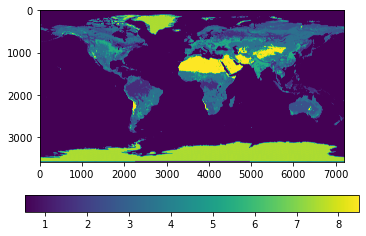

In [5]:
fn = '/gpfs/data1/lianggp/lir/data/IBGP/MCD12C1.A2018001.006.2019200161458.hdf'
#ds = nc.Dataset(fn)
data = Dataset(fn, mode='r')
data.variables.keys()
wv=data.variables['Majority_Land_Cover_Type_1'][:]
wv.shape

lons=np.arange(-180,180,0.05)
lats=np.arange(90,-90,-0.05)
lona,lata=np.meshgrid(lons,lats)

kwv=np.zeros(wv.shape)
kwv[(wv==0)]=0.5  #water bodies
kwv[(wv>=1)&(wv<=5)]=1.5  #forest
kwv[(wv>=6)&(wv<=7)]=2.5  #shrublands
kwv[(wv>=8)&(wv<=10)]=3.5  #grassland
kwv[wv==11]=4.5  #wetlands
kwv[(wv==12)|(wv==14)]=5.5 #croplands
kwv[(wv==13)]=6.5  #urban and built-up lands
kwv[(wv==15)]=7.5  #permenent snow and Ice
kwv[(wv==16)]=8.5 #barren

ltype=['Water\nbodies','Forest','Shrublands','Grassland','Wetlands','Croplands','Urban and\nbuilt-up','Permenent\nsnow&ice','Barren']
cmp = ListedColormap(['skyblue','forestgreen', 'yellowgreen', 'greenyellow','royalblue','gold','plum','snow','tan'])

k=plt.imshow(kwv)
cbar = plt.colorbar(k, orientation='horizontal')

In [8]:
lona=np.arange(-180,180,0.05)
lata=np.arange(90,-90,-0.05)

##-------------------where plot starts-------------------------------------------#
fig=plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

# Add country borders
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linestyle=':')

bg = plt.pcolormesh(lona, lata, kwv, cmap=cmp,vmin=0,vmax=9,transform=ccrs.PlateCarree()) #plot base map
cax = fig.add_axes([0.15,0.02,0.73,0.05]) 
cbar=plt.colorbar(bg, cax=cax, orientation='horizontal')
cbar.ax.set_xticklabels(ltype,rotation=0,ha='left',size=12)

#add point
ax.scatter('lons','lats',c='red',s=60,data=df,label='SURFRAD Site',edgecolors='grey')

# for i in range(testdf.shape[0]):
#     ax.annotate(testdf.ids.values[i], (testdf.lons.values[i], testdf.lats.values[i]))

for ind, rw in df.iterrows():
    if ind == 0:  # Only label the first rectangle
         rect = patches.Rectangle(rw['lon_ulcnr'],rw['lat_ulcnr'], 6, 6, linewidth=1, edgecolor='k', facecolor='none',label='GeoNEX Tile')
    else:
        rect = patches.Rectangle(rw['lon_ulcnr'],rw['lat_ulcnr'], 6, 6, linewidth=1, edgecolor='k', facecolor='none')
    ax.add_patch(rect)

ax.legend(fontsize=14)
    
    
    #add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-138,-126,-114,-102,-90, -78,-66, -54])
gl.ylocator = mticker.FixedLocator([24,36,48,60])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}


plt.show()

NameError: name 'plt' is not defined

In [17]:
newlist = []
for index, row in sitelist.iterrows():
    if row['fLine']<300:
        h2 = row['iH']-1
    else:
        h2 = row['iH']+1

    if row['fCol']<300:
        v2 = row['iV']-1
    else:
        v2 = row['iV']+1

    newlist.append('h{0:02}v{1:02}'.format(h2,v2))
    newlist.append('h{0:02}v{1:02}'.format(row.iH,v2))
    newlist.append('h{0:02}v{1:02}'.format(h2,row.iV))
newlist
    

['h14v02',
 'h15v02',
 'h14v03',
 'h11v02',
 'h12v02',
 'h11v01',
 'h14v03',
 'h15v03',
 'h14v04',
 'h11v04',
 'h10v04',
 'h11v03',
 'h16v02',
 'h17v02',
 'h16v03',
 'h14v03',
 'h13v03',
 'h14v02',
 'h11v02',
 'h12v02',
 'h11v03',
 'h22v15',
 'h21v15',
 'h22v14',
 'h16v04',
 'h17v04',
 'h16v03',
 'h51v14',
 'h52v14',
 'h51v13',
 'h45v11',
 'h46v11',
 'h45v12',
 'h52v11',
 'h51v11',
 'h52v12',
 'h52v03',
 'h51v03',
 'h52v04',
 'h45v05',
 'h44v05',
 'h45v06',
 'h51v06',
 'h50v06',
 'h51v05',
 'h57v18',
 'h58v18',
 'h57v17',
 'h54v14',
 'h55v14',
 'h54v15',
 'h54v03',
 'h53v03',
 'h54v02',
 'h52v04',
 'h53v04',
 'h52v03']

In [19]:
len(newlist)
newlist[:21]

['h14v02',
 'h15v02',
 'h14v03',
 'h11v02',
 'h12v02',
 'h11v01',
 'h14v03',
 'h15v03',
 'h14v04',
 'h11v04',
 'h10v04',
 'h11v03',
 'h16v02',
 'h17v02',
 'h16v03',
 'h14v03',
 'h13v03',
 'h14v02',
 'h11v02',
 'h12v02',
 'h11v03']

In [8]:
DEFAULT_DATA_HOME = '/gpfs/data1/lianggp/lir/solar_data/data/geonex_sat'
DEFAULT_TILELIST   = DEFAULT_DATA_HOME + '/solarsat_sitelist.csv'
DEFAULT_INSITU = DEFAULT_DATA_HOME+'/solarsat_insitu.csv'
sitelist = pd.read_csv(DEFAULT_TILELIST,low_memory=False)
sitelist

,id,name,lats,lons,network,fLine,fCol,elev,timezone,tile_id,lat_ulcnr,lon_ulcnr,lat_lrcnr,lon_lrcnr,time_offset,test
0,1,bon,40.050,-88.370,SURFRAD,60,60,213.0000,America/Chicago,1,43.05,-91.37,37.05,-85.37,-6.0,0
1,2,fpk,48.310,-105.100,SURFRAD,60,60,623.3125,America/Denver,2,51.31,-108.10,45.31,-102.10,-7.0,0
2,3,gwn,34.250,-89.870,SURFRAD,60,60,101.0625,America/Chicago,3,37.25,-92.87,31.25,-86.87,-6.0,0
3,4,dra,36.620,-116.020,SURFRAD,60,60,998.0625,America/Los_Angeles,4,39.62,-119.02,33.62,-113.02,-8.0,0
4,5,psu,40.720,-77.930,SURFRAD,60,60,375.5625,America/New_York,5,43.72,-80.93,37.72,-74.93,-5.0,1
5,6,sxf,43.730,-96.620,SURFRAD,60,60,476.3125,America/Chicago,6,46.73,-99.62,40.73,-93.62,-7.0,0
6,7,tbl,40.120,-105.240,SURFRAD,60,60,1651.5625,America/Denver,7,43.12,-108.24,37.12,-102.24,-7.0,1
7,8,FLO,-27.533,-48.517,BSRN,109,70,55.0000,America/Sao_Paulo,8,-24.00,-54.00,-30.00,-48.00,-4.0,0
8,9,LRC,37.104,-76.387,BSRN,32,97,4.2500,America/New_York,9,42.00,-78.00,36.00,-72.00,-5.0,1
9,10,ASP,-23.798,133.888,BSRN,37,115,548.0625,Australia/Darwin,10,-18.00,132.00,-24.00,138.00,9.0,0


In [21]:
# sitelist['fLine']=(sitelist['fLine']/5).astype(int)
# sitelist['fCol']=(sitelist['fCol']/5).astype(int)

In [25]:
# sitelist.to_csv(DEFAULT_DATA_HOME+'/solarsat_sitelist.csv',index=False)

In [ ]:
# df = sitelist.copy()
# df.drop(['iH', 'iV'], axis=1, inplace=True)
# df['tile_id'] = df['id']
# df.loc[:6, 'fLine'] = 300
# df.loc[:6, 'fCol'] = 300
# df.loc[:6, 'lat_ulcnr'] = (df.loc[:6, 'lats'] + 3).round(2)
# df.loc[:6, 'lon_ulcnr'] = df.loc[:6, 'lons'] - 3
# df.loc[:6, 'lat_lrcnr'] = df.loc[:6, 'lats'] - 3
# df.loc[:6, 'lon_lrcnr'] = df.loc[:6, 'lons'] + 3
# df

In [23]:
kwv_new = np.zeros(kwv.shape)
kwv_new[:,:3600]=kwv[:,3600:]
kwv_new[:,3600:]=kwv[:,:3600]

In [35]:
kwv_new.shape

(3600, 7200)

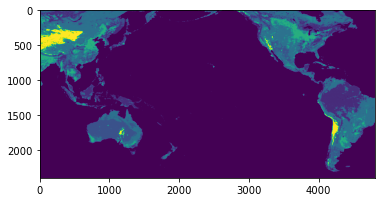

In [24]:
kwv_s = kwv_new[600:3000,1600:6400]
plt.imshow(kwv_s)

In [25]:
lona=np.arange(80,320,0.05)
lata=np.arange(65, -65,-0.05)
kwv_s = kwv_new[500:3100,1600:6400]

/home/lir/.conda/envs/lenv2/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


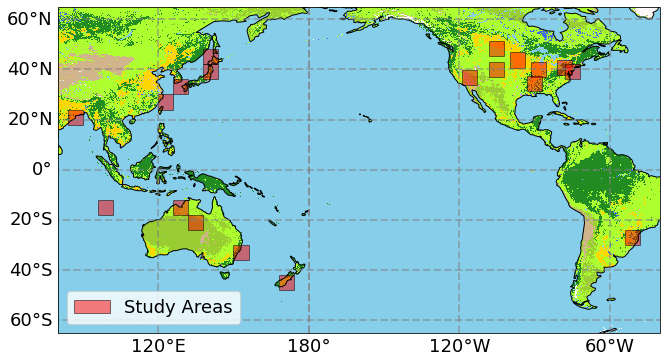

In [26]:
df = sitelist.copy()
df['adjusted_lons'] = df['lons'].apply(lambda x: x + 180 if x < 0 else x - 180)

##-------------------where plot starts-------------------------------------------#
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
# Add gridlines
# ax.gridlines(draw_labels=True)

# Optionally add coastlines and other features
ax.coastlines()
# Set extent to 0 to 360 degrees longitude (via -180 to 180)
ax.set_extent([80,320, -65, 65], crs=ccrs.PlateCarree())



bg = plt.pcolormesh(lona, lata, kwv_s, cmap=cmp,vmin=0,vmax=9,transform=ccrs.PlateCarree()) #plot base map
# cax = fig.add_axes([0.15,0.02,0.73,0.05]) 
# cax2 = fig.add_axes([0.95,0.02,0.02,0.85]) 
# cbar=plt.colorbar(bg, cax=cax, orientation='horizontal')
# cbar.ax.set_xticklabels(ltype,rotation=0,ha='left',size=12)
# cbar=plt.colorbar(bg, cax=cax2, orientation='vertical')
# cbar.ax.set_xticklabels(ltype,rotation=0,ha='right',size=12)


#add point
# ax.scatter('adjusted_lons','lats',c='red',s=30,data=df,label='Ground measurement site',edgecolors='grey')

for ind, rw in sitelist.iterrows():
    if ind == 0:  # Only label the first rectangle
         rect = patches.Rectangle((rw['lon_ulcnr']+180 if rw['lon_ulcnr']<0 else rw['lon_ulcnr']-180,rw['lat_lrcnr']), 6, 6, linewidth=1, edgecolor='k', facecolor='r', alpha=0.5,label='Study Areas')
    else:
        rect = patches.Rectangle((rw['lon_ulcnr']+180 if rw['lon_ulcnr']<0 else rw['lon_ulcnr']-180,rw['lat_lrcnr']), 6, 6, linewidth=1, edgecolor='k', facecolor='r', alpha=0.5)
    ax.add_patch(rect)

ax.legend(fontsize=18, loc = 'lower left')
    
    
    #add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
# gl.ylabels_left = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# # gl.xlocator = mticker.FixedLocator([-138,-126,-114,-102,-90, -78,-66, -54])
# # gl.ylocator = mticker.FixedLocator([24,36,48,60])
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
plt.show()

In [10]:
def adjust_longitude(lon):
    return int((lon + 180) * 20)  # Map -180 to 180 longitude to 0 to 7200 indices

def adjust_latitude(lat):
    return int((90 - lat) * 20)  # Map 90 to -90 latitude to 0 to 3600 indices



In [11]:
# Calculate the distribution
# Extract patches and calculate distribution
all_values = []

for _, row in sitelist.iterrows():
    lat_ul_idx = adjust_latitude(row['lat_ulcnr'])
    lon_ul_idx = adjust_longitude(row['lon_ulcnr'])
    lat_lr_idx = adjust_latitude(row['lat_lrcnr'])
    lon_lr_idx = adjust_longitude(row['lon_lrcnr'])
    print(lat_ul_idx, lon_ul_idx, lat_lr_idx, lon_lr_idx)
    
    patch = kwv[lat_ul_idx:lat_lr_idx, lon_ul_idx:lon_lr_idx]
    all_values.extend(patch.flatten())

# Calculate the distribution
all_values = np.array(all_values)
distribution = np.histogram(all_values)  # Adjust the number of bins as needed

# Print or plot the distribution
print(distribution)

939 1772 1059 1892
773 1438 893 1558
1055 1742 1175 1862
1007 1219 1127 1339
925 1981 1045 2101
865 1607 985 1727
937 1435 1057 1555
2280 2520 2400 2640
960 2040 1080 2160
2160 6240 2280 6360
2040 5520 2160 5640
2040 6120 2160 6240
1080 6120 1200 6240
1320 5280 1440 5400
1200 6000 1320 6120
2640 6960 2760 7080
2400 6600 2520 6720
840 6360 960 6480
960 6360 1080 6480
(array([99949, 30739, 19360, 68358,     0,   664, 46592,  3534,    66,
        4338]), array([0.5, 1.3, 2.1, 2.9, 3.7, 4.5, 5.3, 6.1, 6.9, 7.7, 8.5]))


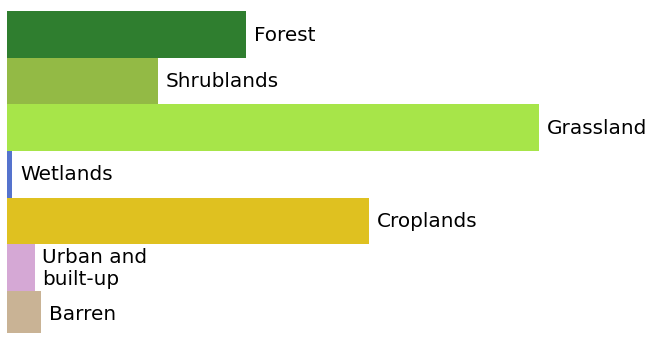

In [98]:
values, counts = np.unique(all_values, return_counts=True)

import pandas as pd
import seaborn as sns
data = pd.DataFrame({'Land Type': ltype, 'Frequency': counts})

# Exclude the first and seventh categories ('Water bodies' and 'Permanent snow & ice')
data = data.drop([0, 7]).reset_index(drop=True)
colors = [cmp.colors[i] for i in range(len(ltype)) if i not in [0, 7]]

# Plot the distribution using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Frequency', y='Land Type', data=data, palette=colors)

# Remove the x and y axes and the title
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("")

# Remove the gaps between bars by setting the bar width
for bar in ax.patches:
    bar.set_height(1)

# Manually add y-axis labels to the right of the bars
for i, patch in enumerate(ax.patches):
    ax.text(patch.get_width() + 1000, patch.get_y() + patch.get_height() / 2, data['Land Type'].iloc[i], ha='left', va='center', size=20)

plt.savefig(f'/gpfs/data1/lianggp/lir/solar_data/plot_results/study_area_distribution.png', dpi=400)
plt.show()

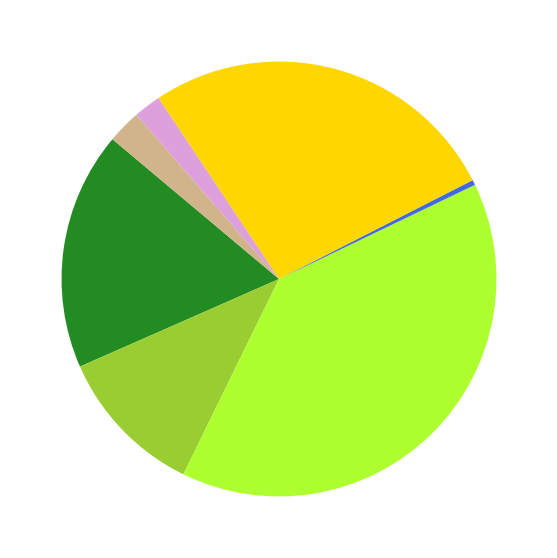

In [21]:
# Calculate frequencies
values, counts = np.unique(all_values, return_counts=True)
data = pd.DataFrame({'Land Type': ltype, 'Frequency': counts})

data = data.drop([0, 7]).reset_index(drop=True)
colors = [cmp.colors[i] for i in range(len(ltype)) if i not in [0, 7]]

# Plot the distribution as a pie chart
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(data['Frequency'], colors=colors, startangle=140)

# # Add labels
# for i, text in enumerate(texts):
#     plt.text(text.get_position()[0]-1, text.get_position()[1], data['Land Type'][i], ha='center', va='center', fontsize=12)

# Save and show the plot
plt.savefig(f'/gpfs/data1/lianggp/lir/solar_data/plot_results/study_area_distribution_pie.png', dpi=400)
plt.show()

/tmp/ipykernel_145586/1949546900.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels(ltype,rotation=0,ha='left',size=12)
/home/lir/.conda/envs/lenv2/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/lir/.conda/envs/lenv2/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


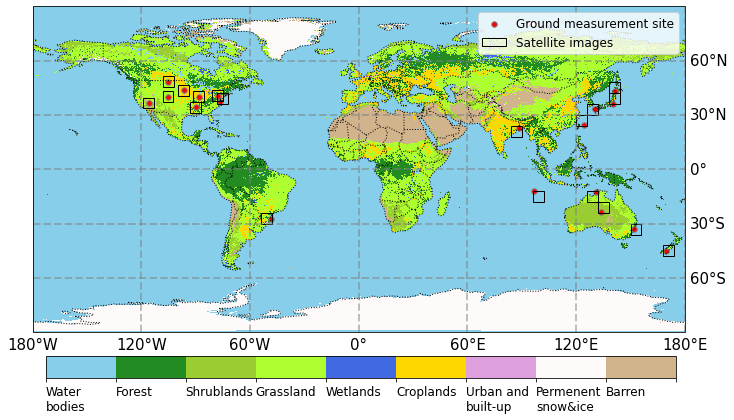

In [13]:
df = sitelist.copy()
lona=np.arange(-180,180,0.05)
lata=np.arange(90,-90,-0.05)

##-------------------where plot starts-------------------------------------------#
fig=plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

# Add country borders
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linestyle=':')

bg = plt.pcolormesh(lona, lata, kwv, cmap=cmp,vmin=0,vmax=9,transform=ccrs.PlateCarree()) #plot base map
cax = fig.add_axes([0.15,0.02,0.73,0.05]) 
cbar=plt.colorbar(bg, cax=cax, orientation='horizontal')
cbar.ax.set_xticklabels(ltype,rotation=0,ha='left',size=12)

#add point
ax.scatter('lons','lats',c='red',s=30,data=df,label='Ground measurement site',edgecolors='grey')

# for i in range(testdf.shape[0]):
#     ax.annotate(testdf.ids.values[i], (testdf.lons.values[i], testdf.lats.values[i]))

for ind, rw in sitelist.iterrows():
    if ind == 0:  # Only label the first rectangle
         rect = patches.Rectangle((rw['lon_ulcnr'],rw['lat_lrcnr']), 6, 6, linewidth=1, edgecolor='k', facecolor='none',label='Satellite images')
    else:
        rect = patches.Rectangle((rw['lon_ulcnr'],rw['lat_lrcnr']), 6, 6, linewidth=1, edgecolor='k', facecolor='none')
    ax.add_patch(rect)

ax.legend(fontsize=12)
    
    
    #add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlocator = mticker.FixedLocator([-138,-126,-114,-102,-90, -78,-66, -54])
# gl.ylocator = mticker.FixedLocator([24,36,48,60])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}


plt.show()